In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
d = datetime.today().strftime("%Y_%m_%d")
df = pd.read_csv(rf"..\data\processed\job_offers_{d}.csv", sep=";", encoding="UTF-8")

In [3]:
display(df)

,name,company,technology,job,location_city,location_country,salary_low,salary_high,salary_curr,salary_avg,is_senior
0,qa/ data analyst,AVENGA,Testing SQL QlikView PySpark,data analyst,wrocław,PL,16800.0,20000.0,PLN,18400.0,0
1,data analyst /product analyst,apreel Sp. z o.o.,Data SQL Cloud computing UX,data analyst,warszawa,PL,23520.0,28560.0,PLN,26040.0,0
2,mid data analyst,SNI,Data SQL BI Qlik,data analyst,wrocław,PL,15120.0,18480.0,PLN,16800.0,0
3,traffic data analyst,RTB House,Backend Python SQL GDS,data analyst,NaN,NaN,10000.0,15000.0,PLN,12500.0,0
4,data analyst,Cognitum Services SA,Data AWS SQL Data analysis,data analyst,warszawa,PL,17000.0,23000.0,PLN,20000.0,0
5,data analyst (qlik admin),Volvo Group,Backend Qlik Azure Databricks,data analyst,NaN,NaN,19000.0,24000.0,PLN,21500.0,0
6,data analyst,Ferrosan Medical Devices,Data Python Degree Data science,data analyst,szczecin,PL,14000.0,24000.0,PLN,19000.0,0
7,data analyst,SymphonyAI,Data Python SQL ETL,data analyst,poznań,PL,0.0,0.0,PLN,0.0,0
8,data analyst,Volvo Group,Data SQL Azure Power BI,data analyst,wrocław,PL,12000.0,18000.0,PLN,15000.0,0
9,data analyst,Schneider Electric,Data Python SQL Tableau,data analyst,warszawa,PL,0.0,0.0,PLN,0.0,0


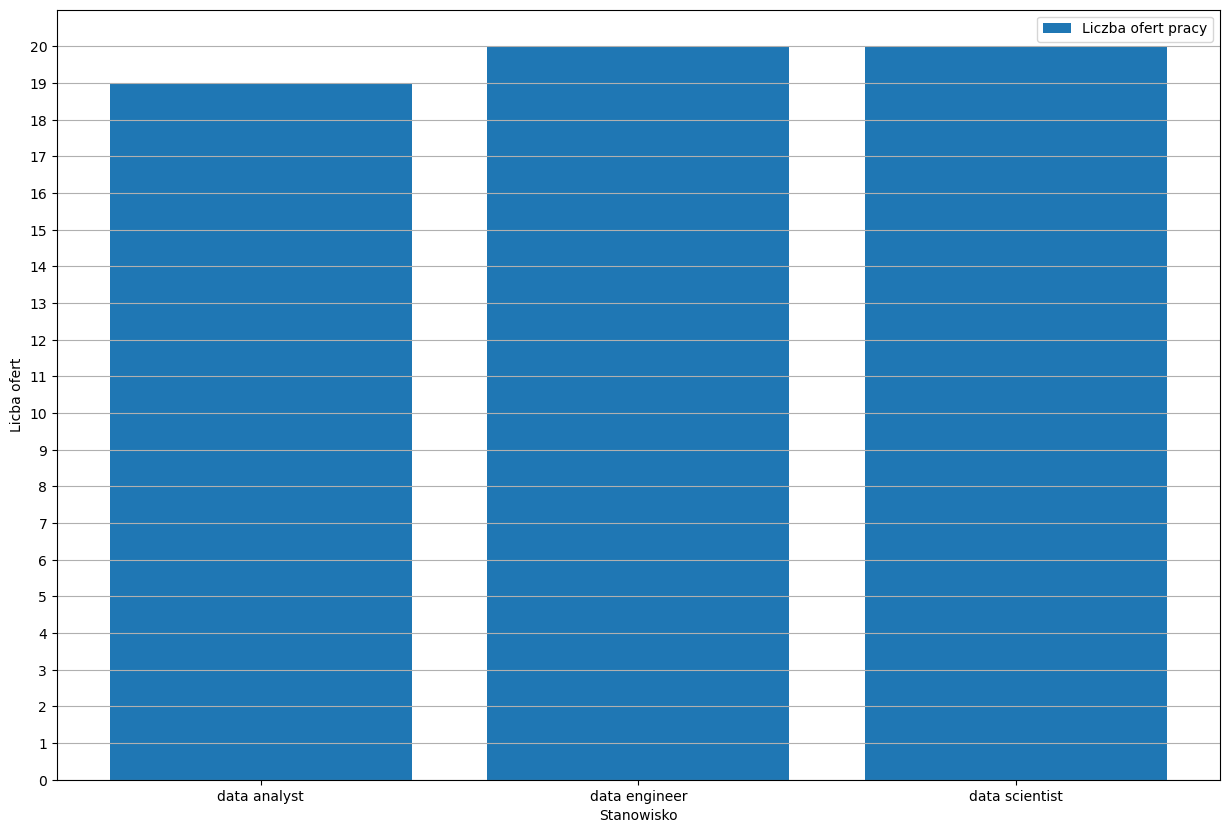

In [4]:
# Ile ofert pracy dla poszczególnego stanowiska zostało znalezione?
d = df.groupby("job").count()
y_axis = [0, 1, 2]
plt.figure(figsize=(15,10))
plt.bar(d.index, d["company"], label = 'Liczba ofert pracy')
plt.xticks(ticks = range(len(d.index)), labels = d.index)
plt.yticks(np.arange(min(y_axis), max(d["company"]) + 1, 1.0))
plt.grid(which="major", axis="y")


plt.xlabel("Stanowisko")
plt.ylabel("Licba ofert")
plt.legend()

plt.show()

In [5]:
range(len(d.index))

range(0, 3)

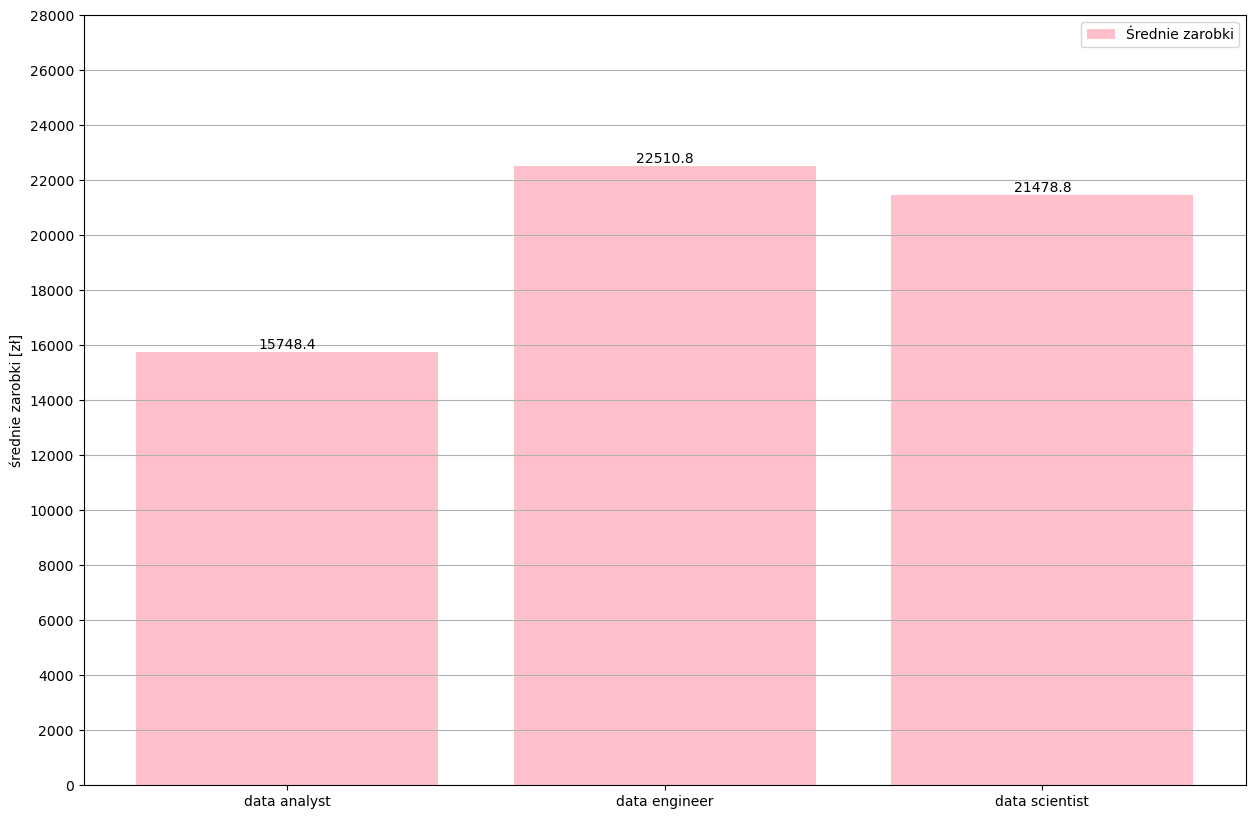

In [6]:
# Jak kształtują się średnie zarobki dla poszczególnych zawodów?
d = df[["job", "salary_avg"]].groupby("job").mean()
d.sort_values(by="salary_avg", ascending = False)
plt.figure(figsize=(15,10))
b = plt.bar(d.index, d["salary_avg"], label="Średnie zarobki", color="pink")
plt.xticks(ticks=range(len(d.index)), labels=d.index)
plt.yticks(ticks=range(0,30000,2000), labels=list(range(0,30000,2000)))
plt.grid(which="major", axis = "y")
plt.bar_label(b)
plt.ylabel("średnie zarobki [zł]")
plt.legend()
plt.show()

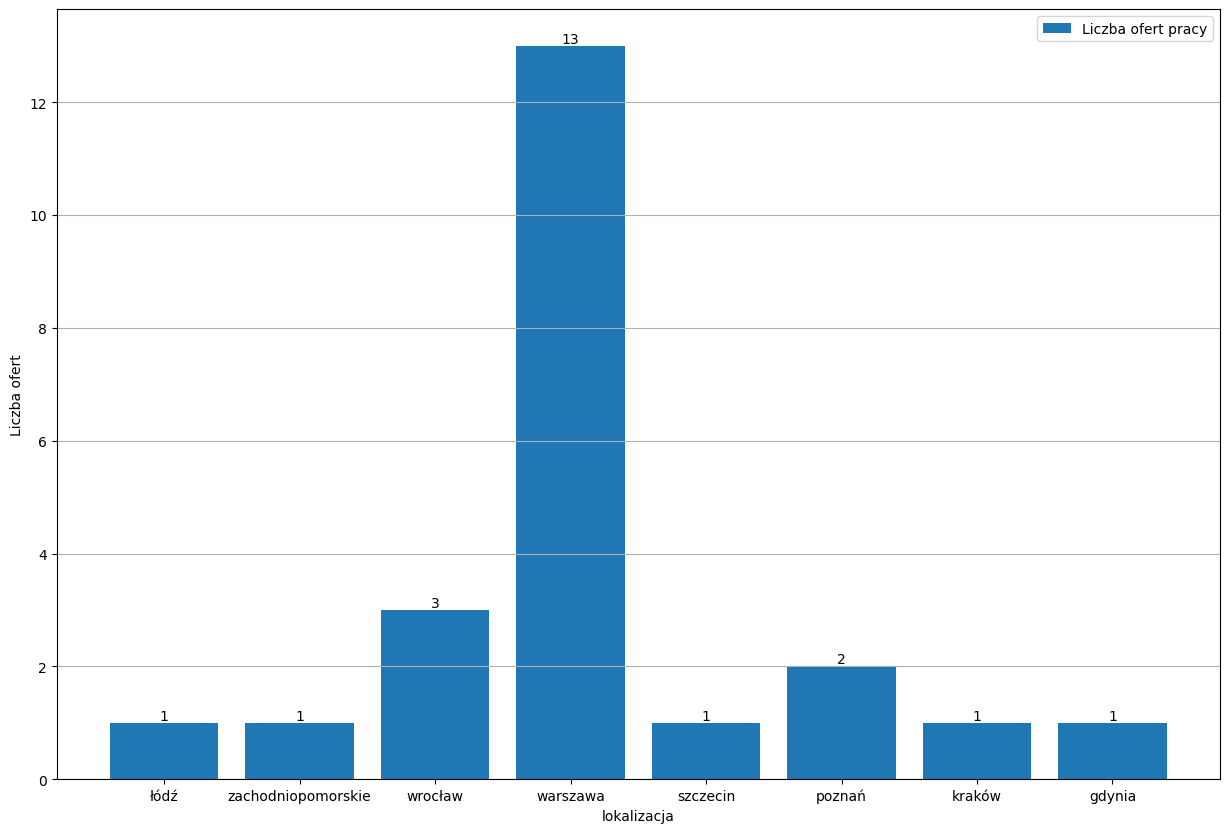

In [7]:
# W którym mieście jest najwięcej ofert pracy?
d = df.groupby("location_city").count()
d = d.sort_values(by="location_city", ascending = False)
plt.figure(figsize=(15,10))
b = plt.bar(d.index, d["company"], label = 'Liczba ofert pracy')
plt.bar_label(b)
plt.grid(which="major", axis="y")
plt.xlabel("lokalizacja")
plt.ylabel("Liczba ofert")
plt.legend()

plt.show()

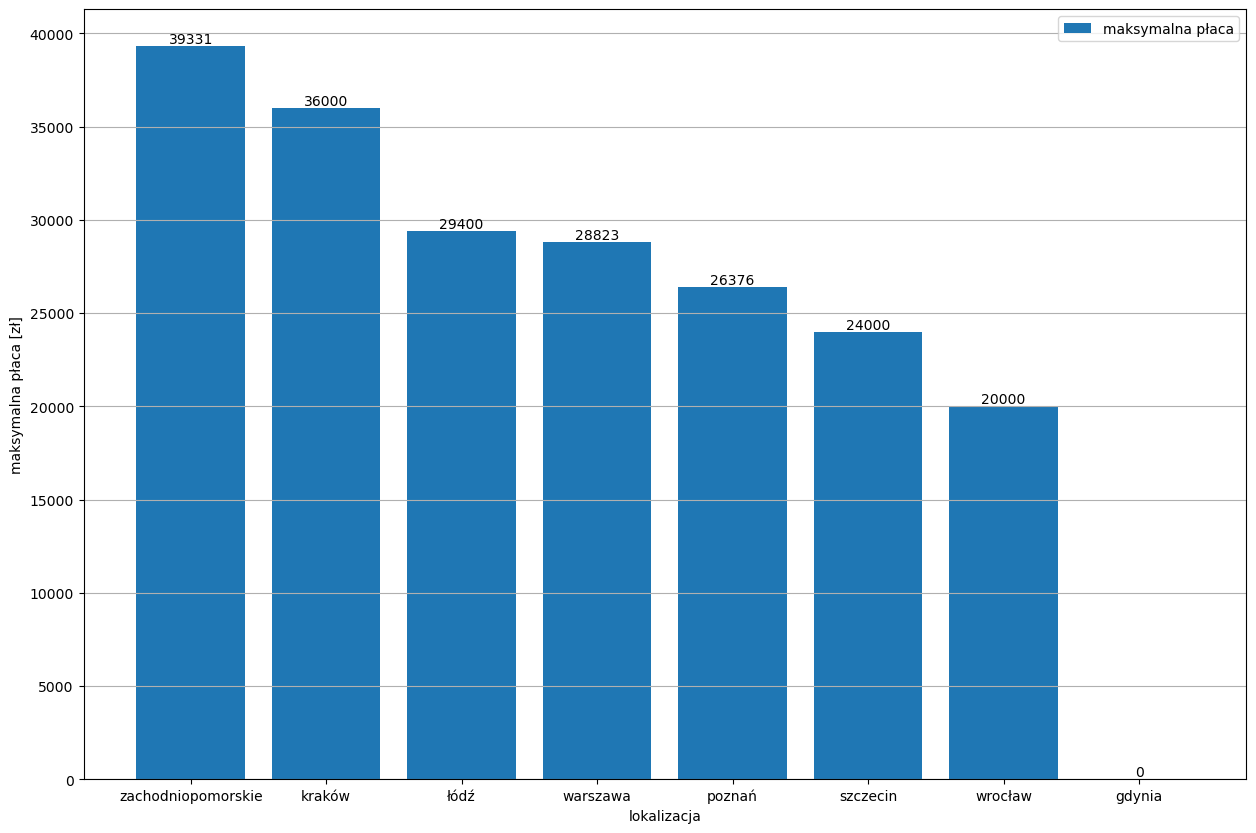

In [8]:
# Gdzie jest oferowana najwyższa stawka?
d = df[["location_city", "salary_high"]].groupby("location_city").max()
d = d.sort_values(by="salary_high", ascending = False)
plt.figure(figsize=(15,10))
b = plt.bar(d.index, d["salary_high"], label = "maksymalna płaca")
plt.bar_label(b)
plt.grid(which="major", axis="y")
plt.xlabel("lokalizacja")
plt.ylabel("maksymalna płaca [zł]")
plt.legend()

plt.show()

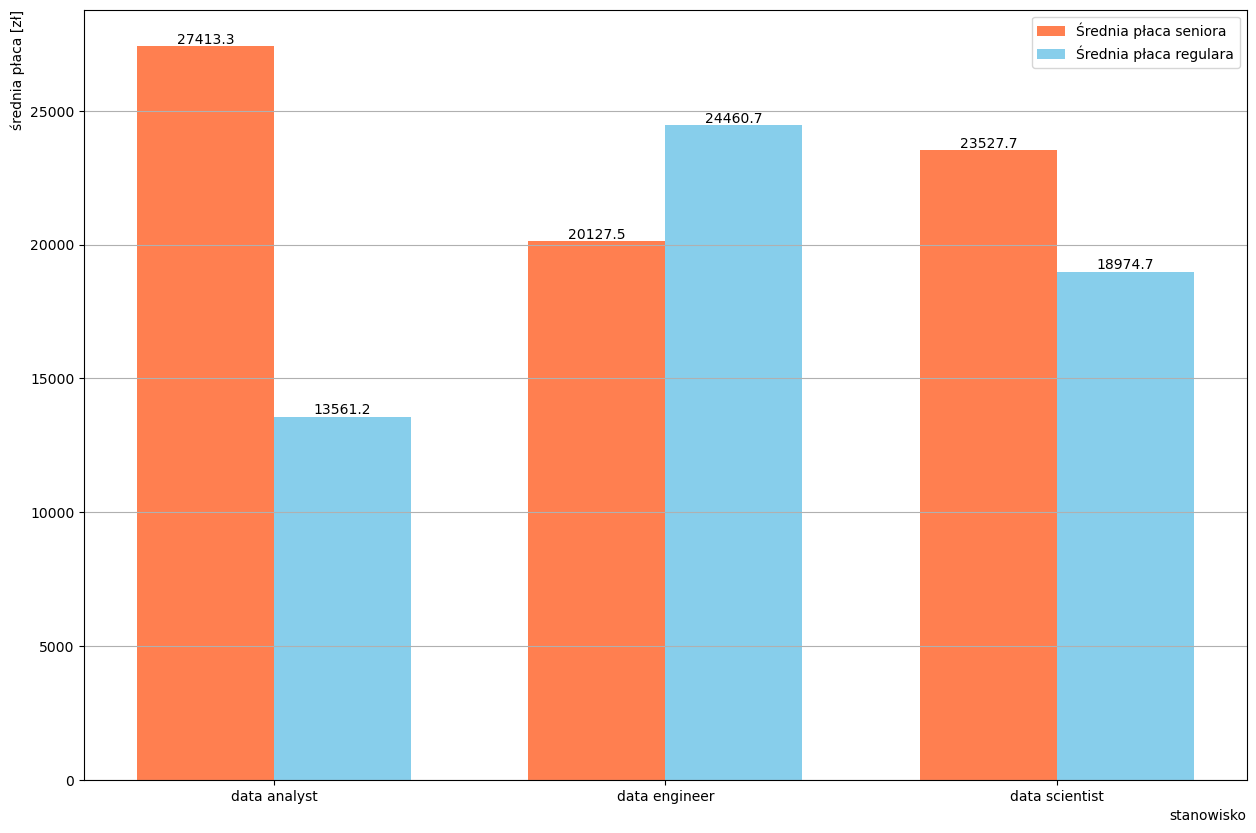

In [14]:
# Jaka jest różnica pomiędzy ofertą dla regular'a a seniora?
d_senior = df.query("is_senior == 1")[["job", "salary_avg"]].groupby("job").mean()
d_regular = df.query("is_senior == 0")[["job", "salary_avg"]].groupby("job").mean()

x_senior = list(range(3))
width = 0.35
x_regular = [x + width for x in x_senior]
x_ticks = [x + width/2 for x in x_senior]


plt.figure(figsize=(15,10))
b1 = plt.bar(x_senior, d_senior["salary_avg"], width=width, label="Średnia płaca seniora", color="coral")
b2 = plt.bar(x_regular, d_regular["salary_avg"], width=width, label="Średnia płaca regulara", color="skyblue")

plt.bar_label(b1)
plt.bar_label(b2)

plt.xticks(ticks=x_ticks, labels=d_senior.index)

plt.grid(which="major", axis="y")
plt.xlabel("stanowisko", loc = "right")
plt.ylabel("średnia płaca [zł]", loc = "top")
plt.legend()

plt.show()

In [18]:
# Jaki jest najniższy możliwy koszt zatrudnienia zespołu złożonego z data analyst, data engineer oraz data scientist?

d = df.groupby("job")[["job", "salary_low"]].max()
display(d)
print(f"Najniższy koszt zespołu: {d['salary_low'].sum():.2f} zł")

,job,salary_low
job,,
data analyst,data analyst,27000.0
data engineer,data engineer,30000.0
data scientist,data scientist,28560.0


Najniższy koszt zespołu: 85560.00 zł


In [20]:
# Czy istnieje możliwość powołania zespołu w jednym mieście? Jeśli tak to gdzie by było najtaniej?
res = pd.DataFrame({"location_city": [], "cheapest_salary": []})
for city in df["location_city"].unique():
    city_data = df.query(f"location_city == '{city}'")[["location_city", "job", "salary_low"]]
    by_jobs = city_data.groupby(["location_city", "job"]).size()
    if len(by_jobs.index) == 3: # są wszystkie trzy stanowiska
        min_sal = city_data.groupby(["location_city", "job"]).min()["salary_low"].sum()
        res.loc[len(res)] = [city, min_sal]

display(res)

,location_city,cheapest_salary
0,warszawa,14000.0
